<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/Final_Exam_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import data set
import pandas as pd
from google.colab import files 
import io

upload = files.upload()

dfZM = pd.read_csv(io.BytesIO(upload['MOVIEDATA.csv']), encoding = 'ISO-8859-1')

Saving MOVIEDATA.csv to MOVIEDATA.csv


Question 1

In [3]:
#imports
import pandas as pd
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Define a function to preprocess the text data
def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Stem the tokens
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join the stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

In [5]:
# Apply the preprocessing function to the Synopsis column
dfZM['Synopsis'] = dfZM['Synopsis'].apply(preprocess)

# Create a document-term matrix using the preprocessed synopses
vectorizer = CountVectorizer()
ZMdtm = vectorizer.fit_transform(dfZM['Synopsis'])

In [6]:
# Create a document-term matrix using the preprocessed synopses
vectorizer = CountVectorizer()
ZMdtm = vectorizer.fit_transform(dfZM['Synopsis'])

In [7]:
# Get the feature names (i.e., the vocabulary)
ZMvocab = list(vectorizer.vocabulary_.keys())

# Count the number of occurrences of each feature
ZMword_counts = ZMdtm.sum(axis=0)

# Sort the features by frequency and get the top 25
ZMtop_words = sorted([(ZMword_counts[0, idx], word) for word, idx in vectorizer.vocabulary_.items()], reverse=True)[:25]

# Print the top 25 words
print('Top 25 words:')
for count, word in ZMtop_words:
    print(f'{word}: {count}')



Top 25 words:
film: 2886
movi: 2622
one: 2561
like: 1684
time: 1399
play: 1388
charact: 1367
make: 1283
get: 1251
would: 1229
stori: 1116
scene: 1078
even: 1075
show: 1028
two: 860
good: 858
much: 846
take: 845
life: 811
love: 810
way: 804
come: 786
work: 783
look: 773
year: 762


Question 2
I am not removing any more stop words.

Question 3

In [8]:
def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and common terms
    stop_words = set(stopwords.words('english'))
    stopword2 = ["film", "movi", "play", "even", "just", "go", "get", "like", "time", "make", "charact", "scene", "show", "1", "2", "year", "come", "may", "john"]
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in stopword2]
    # Stem the tokens
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join the stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text
    # Apply the modified preprocessing function to the Synopsis column
    dfZM['Synopsis'] = dfZM['Synopsis'].apply(preprocess)

    # Create a new CountVectorizer object with the updated vocabulary
    vectorizer = CountVectorizer(vocabulary=[word for word in ZMvocab if word not in stopword2])

    # Fit and transform the preprocessed synopses to obtain the updated DFM
    ZMdtm = vectorizer.fit_transform(dfZM['Synopsis'])


Question 4

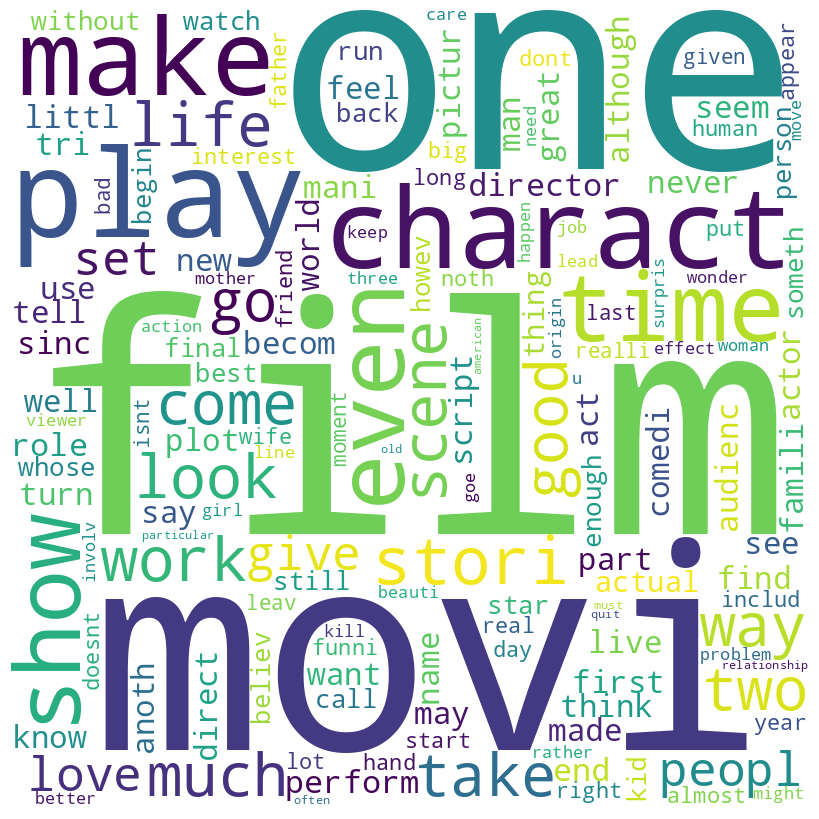

In [9]:
from wordcloud import WordCloud

# Combine all the synopses into a single string
synopsis_text = ' '.join(dfZM['Synopsis'].tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(synopsis_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 5

In [10]:
# Get the counts of each term across all movies
ZMterm_counts = ZMdtm.sum(axis=0)

# Get the indices of the terms that appear at least 15 times
common_terms_idx = [idx for idx, count in enumerate(ZMterm_counts.tolist()[0]) if count >= 15]

# Create a new DTM with only the common terms
ZMdtm_common = ZMdtm[:, common_terms_idx]

# Get the number of movies that each term appears in
term_counts = (ZMdtm_common > 0).sum(axis=0)

# Get the indices of the terms that appear in at least 5 different movies
common_terms_idx = [idx for idx, count in enumerate(term_counts.tolist()[0]) if count >= 5]

# Create a new DTM with only the common terms
ZMdtm_trimmed = ZMdtm_common[:, common_terms_idx]

# Print the dimensions of the trimmed DTM
print(f'The dimensions of the trimmed DTM are {ZMdtm_trimmed.shape[0]} x {ZMdtm_trimmed.shape[1]}.')


The dimensions of the trimmed DTM are 973 x 3457.


Question 6

In [11]:
def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and common terms
    stop_words = set(stopwords.words('english'))
    stopword2 = ["film", "movi", "play", "even", "just", "go", "get", "like", "time", "make", "charact", "scene", "show", "1", "2", "year", "come", "may", "john"]
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in stopword2 and token == 'school']
    # Stem the tokens
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join the stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text


In [12]:
# Apply the modified preprocessing function to the Synopsis column
dfZM['Synopsis'] = dfZM['Synopsis'].apply(preprocess)

# Create a new CountVectorizer object with the updated vocabulary
vectorizer = CountVectorizer(vocabulary=['school'])

# Fit and transform the preprocessed synopses to obtain the DTM
ZMdtm_school = vectorizer.fit_transform(dfZM['Synopsis'])


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between each movie and the "school" term
cosine_similarities = cosine_similarity(ZMdtm_school)


In [14]:
# Get the indices of the top 8 movies
top8_indices = cosine_similarities.argsort()[0][-8:]

# Get the titles of the top 8 movies
top8_titles = dfZM.iloc[top8_indices]['Title'].tolist()

# Print the top 8 titles
print('Top 8 titles related to "school":')
for title in top8_titles:
    print(title)


Top 8 titles related to "school":
Fierce Creatures
Fifth Element, The
Fight Club
Fighting Temptations, The
Finding Forrester
Finding Neverland
Envy
Zoolander


Question 7

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model with 4 topics
lda = LatentDirichletAllocation(n_components=4, random_state=0)

# Fit the model to the document-term matrix
lda.fit(ZMdtm)

# Print the top 8 words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[::-1][:8]
    top_words = [ZMvocab[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")


Topic 1: dolli ballot overrid launer rabinowitz dressup pryce creaturefil
Topic 2: dolli ballot hobo pryce overrid ridiculeworthi rabinowitz launer
Topic 3: ballot pryce dolli launer overrid rabinowitz ridiculeworthi blame
Topic 4: pryce ballot dolli ridiculeworthi ancestri micol spald disease


In [ ]:
#There appears to be no coherent or meaningful context to these words for the topic. This would require further analysis to find more context.